___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/564/0*ToYXqRes95eMvIKV.png" width="250px" height="80px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/564/0*ToYXqRes95eMvIKV.png</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles - Clasificación</font>

Un árbol de decisión es un conjunto de sentencias de la forma: si... entonces...

En un árbol de decisión de clasificación, el árbol busca crear preguntas secuenciales de forma que parta los datos en grupos más pequeños. 

Una vez que las particiones están hechas, una decisión predictiva es hecha a través del nodo final (basado en frecuencias).

**Estructura del árbol**

Toma 3 cosas en cuenta:
- Las variables predictoras (X) que se van a usar y el punto de partición del dataset.
- La profundidad/complejidad del árbol
- La ecuación de predicción en los últimos nodos/hojas del árbol

**Hiperparámetros a ajustar**
- Profundidad del árbol (max_depth)
- Número mínimo de observaciones en cada split(min_samples_split)

**Gini Impurity**
Esta medida nos dice cuál es la probabilidad de clasificar erróneamente una observación. 

*Nota*: mientras más pequeño el valor de Gini, mejor el split. En otras palabras menor la probabilidad de clasificar erróneamente. 

$$Gini = p_{1}(1-p_{1})+p_{2}(1-p_{2})=2(p_{1})(p_{2})$$

Donde $p_{1}$,$p_{2}$ son las probabilidades de la clase 1 y 2 respectivamente. 

Esto no está totalmente completo. La ecuación anterior da el gini impurity para cada sub-partición, pero el objetivo es conocer el gini impurity para toda la partición (porque los datos se dividen a la izquierda y a la derecha). Por lo tanto, necesitamos ponderarlos acordemente:

$$Gini_{ponderado} = p_{I}(2(p_{I1})(p_{I2}))+p_{D}(2(p_{D1})(p_{D2}))$$
 
Donde I=Izquierda, D=Derecha

**Desventajas**

- Inestabilidad del modelo: Debido a que las particiones se basan en un conjunto de datos, si se generan cambios en el conjunto de datos, esto genera cambios importantes en la estructura del árbol y especialmente en su interpretabilidad.

- Rendimiento predictivo subóptimo. Nuevamente, debido a que las particiones se basan en un conjunto de datos específico, el modelo generalmente no converge con el modelo óptimo global.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.metrics import (accuracy_score,precision_score,recall_score)
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_blobs
import warnings 
warnings.filterwarnings('ignore')

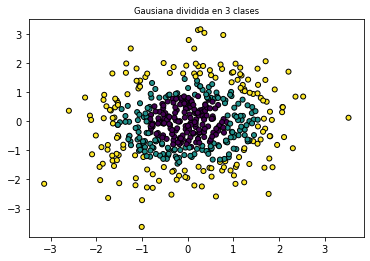

In [2]:
#Generar los datos

X1, Y1 = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=3)

plt.title("Gausiana dividida en 3 clases", fontsize='small')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()

In [3]:
X1

array([[ 1.23228942e+00, -9.88367702e-01],
       [-8.01924922e-01,  2.21365892e-01],
       [-5.11284395e-01,  1.16990879e-01],
       [-6.52212755e-01, -4.03803851e-01],
       [-4.18337368e-01, -9.58155526e-01],
       [-1.15131320e+00, -1.17000892e+00],
       [ 1.03016742e+00, -4.62498346e-01],
       [ 1.40473528e+00,  2.80709032e-01],
       [-4.89186097e-01,  2.78329075e-01],
       [ 3.10341762e-01, -2.24017939e+00],
       [ 2.67480211e-01,  3.74801413e-01],
       [ 1.20889261e+00,  1.84049480e-01],
       [-1.58896790e+00,  4.78596097e-01],
       [-4.81731357e-02,  5.32296901e-01],
       [ 1.72881135e+00,  6.71256597e-01],
       [ 1.23746673e+00, -2.09722635e+00],
       [-1.28187802e+00, -5.19586641e-01],
       [ 6.70475502e-01, -1.98941155e-01],
       [-1.44607978e+00,  4.19690658e-01],
       [-1.04537539e+00, -8.38963276e-01],
       [-1.04326499e+00,  6.19020277e-01],
       [ 5.12904707e-01, -9.58615473e-01],
       [ 5.47383387e-01,  1.69918417e-01],
       [-3.

In [4]:
Y1

array([2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1,
       0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2,

In [5]:
#Dividir datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

In [6]:
max_depths = range(1, 20)

#para el train
training_acc = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X1, Y1)
    training_acc.append(accuracy_score(Y1, model_1.predict(X1)))
    
#para el test    
testing_acc = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_acc.append(accuracy_score(y_test, model_2.predict(X_test)))


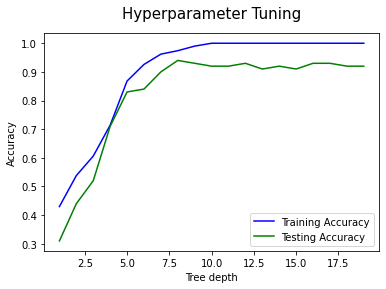

In [7]:
plt.plot(max_depths, training_acc, color='blue', label='Training Accuracy')
plt.plot(max_depths, testing_acc, color='green', label='Testing Accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [8]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  scoring='accuracy')
# entrenamiento del gridsearch
gs.fit(X_train, y_train)


print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 10}


In [9]:
#crear modelo usando parámetros óptimos
new_model = DecisionTreeClassifier(max_depth=10,
                                  min_samples_split=8)
new_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=8)

In [10]:
yhat = new_model.predict(X_test)
accuracy = accuracy_score(y_test,yhat)
print('Accuracy:', accuracy)

Accuracy: 0.92


In [11]:
new_model.feature_importances_

array([0.45639, 0.54361])

In [12]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(new_model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("trees_gen/tree_multipredict")

'trees_gen\\tree_multipredict.pdf'

**Ventajas de los árboles de decisión**

- No requiere escalamiento de variables
- Puede  ser usado para datos no lineales
- Fácil de visualizar
- Fácil de interpretar
- Realizan internamente una selección de variables

**Desventajas de los árboles de decisión**

- Es computancionalmente complejo, especialmente al usar cross-validation para ajustar los hiperparámetros
- Un cambio pequeño en los datos puede causar grandes cambios en la estructura del árbol